# This is for Lab 6

In [1]:
!pip install scikit-learn #ML library featuring classification, regression, clustering including support vector machine, random forest, gradient boosting, k-means, DBSCAN
!pip install --upgrade pixiedust # open-source helper library, add-on to Jupyter notebook to improve UX working with data
!pip install seaborn

     |████████████████████████████████| 204kB 29.7MB/s 
  Created wheel for pixiedust: filename=pixiedust-1.1.19-cp37-none-any.whl size=321804 sha256=3ed3b846859b62416940463f518851cd95f7806676cc07a9716c6cc41729e0d1
  Stored in directory: /root/.cache/pip/wheels/79/1a/a5/43fa9a411168a8ffd6ceffdd3c3be5fdbe7451050ba857f53c
Successfully built pixiedust


In [2]:
import pixiedust
import sklearn
import pandas as pd

from sklearn.ensemble import RandomForestClassifier # ML algorithm for both classification and regression tasks
import numpy as np # for large, multi-dimensional arrays and matrices, and high-level mathematical functions
from sklearn.model_selection import train_test_split # for splitting data arrays into two subsets: for training data and for testing data
from scipy.io import arff # scientific computation library that uses NumPy underneath

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [3]:
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')

Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'


In [4]:
raw_df.head()

,HOUSEHOLD_ID,DRIVER_ID,POLICY_ID,CLAIM_ID,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,LOSS_EVENT_TIME,CLAIM_INIT_TIME,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,FLAG_FOR_FRAUD_INV,PRIMARY_DRIVER_ID,START_DATE,EXPIRY_DATE,MODEL_YEAR,MAKE,MODEL,PLATE,COLOR,INITIAL_ODOMETER,LOW_MILEAGE_USE,FIRST_NAME,LAST_NAME,GENDER,BIRTHDATE,SSN,DRIVERS_LICENSE_ID,DRIVERS_LICENSE_EXPIRY,DRIVERS_LICENSE_STATE,DATE_AT_CURRENT_ADDRESS,CONTACT_NUMBER,EMAIL,COMMUTE_DISCOUNT,WORK_ADDR_NUMB,WORK_ADDR_STREET_NAME,WORK_ADDR_UNIT_DESIGNATION,WORK_ADDR_UNIT_NUMBER,WORK_ADDR_CITY,WORK_ADDR_STATE,WORK_ADDR_ZIPCODE,WORK_ADDR_LATITUDE,WORK_ADDR_LONGITUDE,WORK_ADDR_PBKEY,ADDR_STREET_NUMBER,ADDR_STREET_NAME,ADDR_UNIT_DESIGNATION,ADDR_UNIT_NUMBER,CITY,STATE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY
0,CH42335,XZJ2837,NW5567882,A-2017-UU907,3,NaN,1,157654.9,2017-04-25 00:00:00.0,2017-04-28 00:00:00.0,1,1,41.902103,-87.755624,35765.0,1,XZJ2837,2016-09-19,2017-09-19,2010,Nissan,Sentra,MJCW106,Silver,144972.0,0,Will,Dorau,M,1973-12-25,457-20-9007,X151-5971-1594,2018-08-19,IL,1999-04-16,634-603-0960,wdorau@freshmaail.com,0,3411,N ASHLAND AVE,NaN,NaN,CHICAGO,IL,60657,41.943749,-87.668369,P00007UWRNHZ,2153,MALLARD LN,NaN,NaN,HANOVER PARK,IL,60133,41.943656,-88.158922,-88.158922
1,IH49805,VVR6423,UR4864804,A-2018-FI481,3,NaN,3,226154.5,2018-08-26 00:00:00.0,2018-08-31 00:00:00.0,0,1,41.963562,-87.731397,1909.0,0,VVR6423,2017-06-14,2018-06-14,2008,Dodge,Ram,LKUD688,White,212580.0,0,Tammie,Mostrom,F,1945-09-14,718-38-8987,K702-7678-1851,2018-01-27,IL,2011-06-09,827-916-0381,tmostrom@yahoot.com,0,1048,N ASHLAND AVE,NaN,NaN,CHICAGO,IL,60622,41.901134,-87.667780,P00007UWEN7G,13886,W EMMA LN,NaN,NaN,METTAWA,IL,60045,42.249667,-87.903629,-87.903629
2,AF28736,UQM2512,RR8595908,A-2016-ZG694,1,NaN,1,83968.6,2016-01-07 00:00:00.0,2016-01-11 00:00:00.0,0,2,41.736602,-87.604968,25730.0,1,UQM2512,2015-08-24,2016-08-23,2009,Chevrolet,Equinox,OBQU415,White,77994.0,1,Esther,Sebranek,F,1988-05-16,076-62-7083,V549-5272-3181,2019-11-19,IL,2005-05-21,723-552-0479,esebranek@zohoo.com,0,176,N BRANDON DR,NaN,NaN,GLENDALE HEIGHTS,IL,60139,41.930979,-88.082189,P00007UTGSGT,8726,S DORCHESTER AVE,NaN,NaN,CHICAGO,IL,60619,41.736025,-87.590889,-87.590889
3,EF53594,YDT5591,RN5640634,A-2016-NG783,1,NaN,1,309570.3,2016-12-11 00:00:00.0,2016-12-18 00:00:00.0,0,1,41.909925,-87.731557,40880.0,1,YDT5591,2015-07-25,2016-07-24,2002,Chevrolet,Equinox,EVOQ882,White,296352.0,0,Donny,Nickless,M,1974-01-18,571-32-3662,Z350-2956-6553,2019-05-16,IL,2000-03-11,741-637-0631,dnickless@life.com,0,4820,W 25TH ST,NaN,NaN,CICERO,IL,60804,41.846048,-87.745150,P00007UWRZX0,543,N HARDING AVE,NaN,NaN,CHICAGO,IL,60624,41.891161,-87.724383,-87.724383
4,LD32277,ONM5465,YY1229530,A-2017-ZO863,3,NaN,3,136633.9,2017-06-06 00:00:00.0,2017-06-08 00:00:00.0,0,1,41.923750,-87.789881,2130.0,0,JZZ5688,2016-01-08,2017-01-07,2010,Honda,CR-V,OGDM932,White,134244.0,0,Floyd,Liggan,M,1950-05-01,315-84-4443,E912-8544-3880,2020-07-06,IL,2012-07-04,735-427-0152,fliggan@mooosend.com,0,2323,N CLIFTON AVE,NaN,NaN,CHICAGO,IL,60614,41.924384,-87.656840,P00007UWO5N5,6952,S HALSTED ST,NaN,NaN,CHICAGO,IL,60621,41.767273,-87.644831,-87.644831


In [5]:
display(raw_df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["EXPIRY_DATE"] = pd.to_datetime(raw_df["EXPIRY_DATE"])
raw_df["LOSS_EVENT_TIME"] = pd.to_datetime(raw_df["LOSS_EVENT_TIME"])
raw_df["DAYS_FROM_LOSS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["EXPIRY_DATE"]
raw_df["DAYS_FROM_LOSS"] = abs(raw_df.DAYS_FROM_LOSS.dt.days)
raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1 # Not Fraud
raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0 # Fraud

In [10]:
notfraud = len(raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'])
notfraud

915

In [11]:
Fraud = len(raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'])
Fraud

60

In [12]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [13]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df["DRIVERS_LICENSE_EXPIRY"] - raw_df["LOSS_EVENT_TIME"]
raw_df["DAYS_FROM_L_EXPIRY"] 

0      481 days
1     -211 days
2     1412 days
3      886 days
4     1126 days
         ...   
970    571 days
971   1097 days
972   1219 days
973   1332 days
974   1478 days
Name: DAYS_FROM_L_EXPIRY, Length: 975, dtype: timedelta64[ns]

In [14]:
raw_df["DAYS_FROM_L_EXPIRY"] = raw_df.DAYS_FROM_L_EXPIRY.dt.days
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0 # not Expired
raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1 # Expired

In [15]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)
raw_df["EXPIRED_LICENSE"].value_counts()

0.0    936
1.0     39
Name: EXPIRED_LICENSE, dtype: int64

In [17]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)
raw_df["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])
raw_df["DAYS_AT_ADDRESS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["DATE_AT_CURRENT_ADDRESS"]
raw_df["DAYS_AT_ADDRESS"] = abs(raw_df.DAYS_AT_ADDRESS.dt.days)
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1 # Low change of Address
raw_df.loc[raw_df['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0 # Freq change of Address

In [18]:
# Frequent changes of residence
raw_df["SUSPICIOUS_LIVING"].value_counts()

1.0    973
0.0      2
Name: SUSPICIOUS_LIVING, dtype: int64

In [20]:
# High mileage at loss event for a policyholder with a low mileage discount

#7500/year
raw_df["START_DATE"] = pd.to_datetime(raw_df["START_DATE"])
#find number of days between policy creation and accident
raw_df["LENGTH_OF_POLICY"]=(raw_df["LOSS_EVENT_TIME"] - raw_df["START_DATE"]).dt.days
#convert to years
raw_df["LENGTH_OF_POLICY"]=raw_df["LENGTH_OF_POLICY"]/365
#divide Odometer at loss by years
raw_df["MILES/YEAR"] = raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_OF_POLICY"]
raw_df["MILES/YEAR"].value_counts()

145432.118234    1
234953.253233    1
55515.574648     1
123525.401515    1
198472.566993    1
                ..
98941.082789     1
100299.475188    1
61050.847328     1
54548.889011     1
170432.357027    1
Name: MILES/YEAR, Length: 975, dtype: int64

In [21]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss
raw_df.loc[raw_df["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1 # Low Mileage
raw_df.loc[raw_df["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0 # High Mileage

In [22]:
raw_df["LOW_MILEAGE_AT_LOSS"].value_counts()

0.0    975
Name: LOW_MILEAGE_AT_LOSS, dtype: int64

In [23]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]==raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0 # Potential Genuine as the low mileage use column is equivalent and assigned value of 0
raw_df.loc[raw_df["LOW_MILEAGE_USE"]!=raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1 # Potential Fraud as the low mileage use is not equal to the mileage use column shown, and assigned as 1

In [24]:
# High mileage at loss event for a policyholder with a low mileage discount
raw_df["SUSPICIOUS_MILEAGE"].value_counts()

0.0    885
1.0     90
Name: SUSPICIOUS_MILEAGE, dtype: int64

In [25]:
raw_df.loc[raw_df["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0 # Genuine Claim
raw_df.loc[raw_df["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1 # Excessive Claim

In [26]:
# High number of previous claims
raw_df["EXCESSIVE_CLAIM_AMOUNT"].value_counts()

0.0    547
1.0    428
Name: EXCESSIVE_CLAIM_AMOUNT, dtype: int64

In [27]:
# dataframes for certain features
features = ['FLAG_FOR_FRAUD_INV',
'SUSPICIOUS_MILEAGE',
'EXPIRED_LICENSE',
'SUSPICIOUS_CLAIM_TIME',
'SUSPICIOUS_LIVING',
'EXCESSIVE_CLAIM_AMOUNT']

In [28]:
df_model = raw_df[features]
df_model

,FLAG_FOR_FRAUD_INV,SUSPICIOUS_MILEAGE,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,EXCESSIVE_CLAIM_AMOUNT
0,1,0.0,0.0,1.0,1.0,1.0
1,0,0.0,1.0,1.0,1.0,0.0
2,1,1.0,0.0,1.0,1.0,1.0
3,1,0.0,0.0,1.0,1.0,1.0
4,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...
970,1,0.0,0.0,1.0,1.0,1.0
971,0,0.0,0.0,1.0,1.0,0.0
972,1,0.0,0.0,0.0,1.0,1.0
973,0,0.0,0.0,1.0,1.0,0.0


In [29]:
#ensure all relevant features are integers
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype
df_model[["SUSPICIOUS_LIVING"]] = df_model[["SUSPICIOUS_LIVING"]].astype(int)
df_model[["EXPIRED_LICENSE"]] = df_model[["EXPIRED_LICENSE"]].astype(int)
df_model[["SUSPICIOUS_CLAIM_TIME"]] = df_model[["SUSPICIOUS_CLAIM_TIME"]].astype(int)
df_model[["SUSPICIOUS_MILEAGE"]] = df_model[["SUSPICIOUS_MILEAGE"]].astype(int)
df_model[["EXCESSIVE_CLAIM_AMOUNT"]] = df_model[["EXCESSIVE_CLAIM_AMOUNT"]].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
raw_df.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,MODEL_YEAR,INITIAL_ODOMETER,LOW_MILEAGE_USE,COMMUTE_DISCOUNT,WORK_ADDR_ZIPCODE,WORK_ADDR_LATITUDE,WORK_ADDR_LONGITUDE,ZIPCODE,LATITUDE,LONGITUDE,PBKEY,DAYS_FROM_LOSS,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,2008.365554,173128.724077,0.094903,0.068541,60471.629174,41.873005,-87.771678,60380.003515,41.894975,-87.856601,-87.856601,117.021090,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.0,0.094903,0.086116
1,1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,2008.697044,167987.467980,0.088670,0.049261,60457.443350,41.853018,-87.798898,60410.283251,41.883648,-87.863620,-87.863620,118.160099,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.0,0.088670,0.933498


In [32]:
#split data into x and y variables
xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]
yVar = df_model["FLAG_FOR_FRAUD_INV"]

In [33]:
xVar.head()

,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [34]:
yVar.head()

0    1
1    0
2    1
3    1
4    0
Name: FLAG_FOR_FRAUD_INV, dtype: int64

In [35]:
#split into a test/train set
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [36]:
X_train.shape, y_train.shape

((780, 5), (780,))

In [37]:
#train model
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# n_estimatorsint, default=100; The number of trees in the forest.
# https://scikit-learn.org/stable/glossary.html#term-random_state
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
#create confusion matrix to gut check model
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,98,13
1,4,80


In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[98, 13],
       [ 4, 80]])

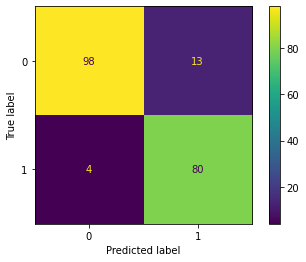

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

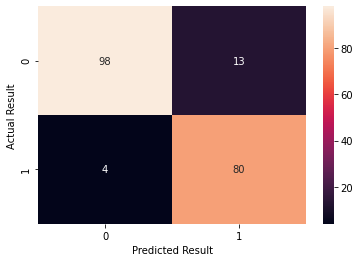

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)


import seaborn as sn
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()